In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import math


In [39]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [40]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


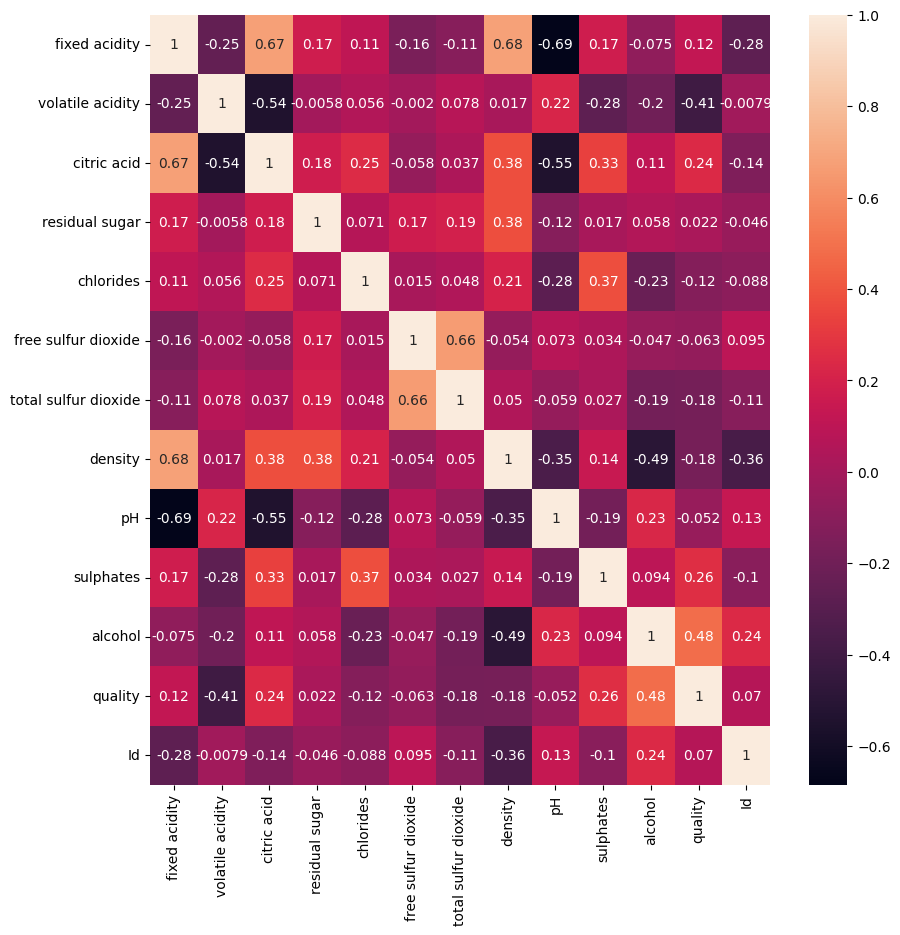

In [42]:
# correlation = df.corr
# ax =
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)

plt.show()

In [43]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [44]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [45]:
df.shape


(1143, 13)

In [46]:
df.duplicated().sum()


0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [48]:
df['quality'] = df.quality.apply(lambda x: 1 if x>=6 else 0 )
df['quality'].value_counts()

quality
1    621
0    522
Name: count, dtype: int64

In [49]:
df.drop(['Id'], axis = 1)
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=4)
print("X_train",X_train.shape )
print("y_train",y_train.shape )
print("X_test",X_test.shape )
print("y_test",y_test.shape )

X_train (822, 12)
y_train (822,)
X_test (321, 12)
y_test (321,)


In [51]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


MODEL TRAINING

In [52]:
# Create the linear regression models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Fit the models to the train data
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elasticnet.fit(X_train_scaled, y_train)

#prediction
lr_pred = lr.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)
elasticnet_pred = elasticnet.predict(X_test_scaled)

## Model Score/ Accuracy
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

print("Linear Regression: MSE - ", lr_mse, ", RMSE:",math.sqrt(lr_mse), "r2:", lr_r2 )
print("Ridge Regression: MSE - ", ridge_mse, ", RMSE:",math.sqrt(ridge_mse) )
print("Lasso Regression: MSE - ", lasso_mse, ", RMSE:",math.sqrt(lasso_mse) )
print("ElasticNet Regression: MSE - ", elasticnet_mse, ", RMSE:",math.sqrt(elasticnet_mse) )


Linear Regression: MSE -  0.18582900736325106 , RMSE: 0.4310788876334018 r2: 0.24774075792736883
Ridge Regression: MSE -  0.18573965577225324 , RMSE: 0.43097523800359255
Lasso Regression: MSE -  0.24727085829592296 , RMSE: 0.49726336914750013
ElasticNet Regression: MSE -  0.24727085829592296 , RMSE: 0.49726336914750013


In [53]:
# Logistic Regression

from sklearn import linear_model



logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [54]:
logr_pred = logr.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logr_accuracy = accuracy_score(y_test, logr_pred)
logr_precision = precision_score(y_test, logr_pred)
logr_recall = recall_score(y_test, logr_pred)
logr_f1 = f1_score(y_test, logr_pred)


In [56]:
print(f"Accuracy: {logr_accuracy:.2f}")
print(f"Precision: {logr_precision:.2f}")
print(f"Recall: {logr_recall:.2f}")
print(f"F1-Score: {logr_f1:.2f}")
# print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.74
Precision: 0.76
Recall: 0.79
F1-Score: 0.77


In [57]:
# from sklearn.model_selection import GridSearchCV

# # Define a grid of hyperparameters to search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'solver': ['liblinear', 'lbfgs'],
#     'max_iter': [100, 500, 1000],
# }

# # Create a grid search object
# grid_search = GridSearchCV(linear_model.LogisticRegression(), param_grid, cv=5)

# # Perform the grid search on the training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train a logistic regression model with the best hyperparameters
# best_model = linear_model.LogisticRegression(**best_params)
# best_model.fit(X_train_scaled, y_train)
# logr_pred = best_model.predict(X_test_scaled)


# logr_accuracy = accuracy_score(y_test, logr_pred)
# logr_precision = precision_score(y_test, logr_pred)
# logr_recall = recall_score(y_test, logr_pred)
# logr_f1 = f1_score(y_test, logr_pred)


# print(f"Accuracy: {logr_accuracy:.2f}")
# print(f"Precision: {logr_precision:.2f}")
# print(f"Recall: {logr_recall:.2f}")
# print(f"F1-Score: {logr_f1:.2f}")



In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [59]:
rf_pred = rf_model.predict(X_test_scaled)

In [60]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")



Accuracy: 0.77
Precision: 0.79
Recall: 0.80
F1-Score: 0.79


In [61]:
# from sklearn.model_selection import GridSearchCV

# # Define a grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a grid search object
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# # Perform the grid search on the training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train a logistic regression model with the best hyperparameters
# best_model = RandomForestClassifier(**best_params)
# best_model.fit(X_train_scaled, y_train)
# new_pred = best_model.predict(X_test_scaled)


# new_pred_accuracy = accuracy_score(y_test, new_pred)
# new_pred_precision = precision_score(y_test, new_pred)
# new_pred_recall = recall_score(y_test, new_pred)
# new_pred_f1 = f1_score(y_test, new_pred)


# print(f"Accuracy: {new_pred_accuracy:.2f}")
# print(f"Precision: {new_pred_precision:.2f}")
# print(f"Recall: {new_pred_recall:.2f}")
# print(f"F1-Score: {new_pred_f1:.2f}")


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm as lgb

# Define base models (Random Forest, XGBoost, LightGBM)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, random_state=42))
]

# Define the meta-classifier (Logistic Regression is a common choice)
meta_model = linear_model.LogisticRegression()

# Create a stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)
new_pred0 = stacking_model.predict(X_test_scaled)


new_pred0_accuracy = accuracy_score(y_test, new_pred0)
new_pred0_precision = precision_score(y_test, new_pred0)
new_pred0_recall = recall_score(y_test, new_pred0)
new_pred0_f1 = f1_score(y_test, new_pred0)


print(f"Accuracy: {new_pred0_accuracy:.2f}")
print(f"Precision: {new_pred0_precision:.2f}")
print(f"Recall: {new_pred0_recall:.2f}")
print(f"F1-Score: {new_pred0_f1:.2f}")

# Accuracy: 0.78
# Precision: 0.79
# Recall: 0.81
# F1-Score: 0.80



Accuracy: 0.78
Precision: 0.79
Recall: 0.81
F1-Score: 0.80


In [63]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train a logistic regression model on the resampled data

stacking_model.fit(X_train_resampled, y_train_resampled)
new_pred10 = stacking_model.predict(X_test_scaled)


new_pred10_accuracy = accuracy_score(y_test, new_pred10)
new_pred10_precision = precision_score(y_test, new_pred10)
new_pred10_recall = recall_score(y_test, new_pred10)
new_pred10_f1 = f1_score(y_test, new_pred10)


print(f"Accuracy: {new_pred10_accuracy:.2f}")
print(f"Precision: {new_pred10_precision:.2f}")
print(f"Recall: {new_pred10_recall:.2f}")
print(f"F1-Score: {new_pred10_f1:.2f}")


Accuracy: 0.77
Precision: 0.78
Recall: 0.81
F1-Score: 0.79


In [64]:
# Import XGBoost and LightGBM libraries
import xgboost as xgb
import lightgbm as lgb

# Create and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Create and train a LightGBM classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)



new_pred1 = xgb_model.predict(X_test_scaled)
new_pred2 = lgb_model.predict(X_test_scaled)


new_pred1_accuracy = accuracy_score(y_test, new_pred1)
new_pred1_precision = precision_score(y_test, new_pred1)
new_pred1_recall = recall_score(y_test, new_pred1)
new_pred1_f1 = f1_score(y_test, new_pred1)

new_pred2_accuracy = accuracy_score(y_test, new_pred2)
new_pred2_precision = precision_score(y_test, new_pred2)
new_pred2_recall = recall_score(y_test, new_pred2)
new_pred2_f1 = f1_score(y_test, new_pred2)


print(f"Accuracy: {new_pred1_accuracy:.2f}")
print(f"Precision: {new_pred1_precision:.2f}")
print(f"Recall: {new_pred1_recall:.2f}")
print(f"F1-Score: {new_pred1_f1:.2f}")


print(f"Accuracy: {new_pred2_accuracy:.2f}")
print(f"Precision: {new_pred2_precision:.2f}")
print(f"Recall: {new_pred2_recall:.2f}")
print(f"F1-Score: {new_pred2_f1:.2f}")



Accuracy: 0.75
Precision: 0.76
Recall: 0.80
F1-Score: 0.78
Accuracy: 0.77
Precision: 0.78
Recall: 0.81
F1-Score: 0.80


In [65]:
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required to be a leaf node
    'random_state': [42]                    # Seed for random number generation
}


# Create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = grid_search.best_params_









In [66]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting iterations
    'max_depth': [3, 4, 5],               # Maximum depth of the tree
    'learning_rate': [0.1, 0.2, 0.3],     # Learning rate
    'subsample': [0.8, 0.9, 1.0],         # Subsample ratio of training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
           
}


# Create a grid search object
grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search.best_params_


In [67]:
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting iterations
    'max_depth': [3, 4, 5],               # Maximum depth of the tree
    'learning_rate': [0.1, 0.2, 0.3],     # Learning rate
    'subsample': [0.8, 0.9, 1.0],         # Subsample ratio of training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
 
}



# Create a grid search object
grid_search = GridSearchCV(lgb.LGBMClassifier(), lgbm_param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_lgbm = grid_search.best_params_


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


rf = RandomForestClassifier(**best_params_rf)
xgb_model = xgb.XGBClassifier(**best_params_xgb)  # Tune max_depth
lgbm_model = lgb.LGBMClassifier(**best_params_lgbm)  # Tune max_depth


# Define base models with different hyperparameters
base_models = [
    ('rf', rf),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
]


# Define the meta-classifier (Logistic Regression is a common choice)
meta_model = LogisticRegression()

# Create a stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model with the best hyperparameters
best_stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
best_stacking_model.fit(X_train_scaled, y_train)
new_pred4 = best_stacking_model.predict(X_test_scaled)


new_pred4_accuracy = accuracy_score(y_test, new_pred4)
new_pred4_precision = precision_score(y_test, new_pred4)
new_pred4_recall = recall_score(y_test, new_pred4)
new_pred4_f1 = f1_score(y_test, new_pred4)


print(f"Accuracy: {new_pred4_accuracy:.2f}")
print(f"Precision: {new_pred4_precision:.2f}")
print(f"Recall: {new_pred4_recall:.2f}")
print(f"F1-Score: {new_pred4_f1:.2f}")




Accuracy: 0.75
Precision: 0.76
Recall: 0.79
F1-Score: 0.78
